# 산업경영수리기법 HW \#3
## 산업공학과 2011-11989 조재민

# 1. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools

In [2]:
def f(x, t):
    dxdt = np.zeros(2)
    dxdt[0] = x[0] * (  2 -   x[0] -   x[1])
    dxdt[1] = x[1] * ( -2 + 4*x[0] - 2*x[1])
    return dxdt

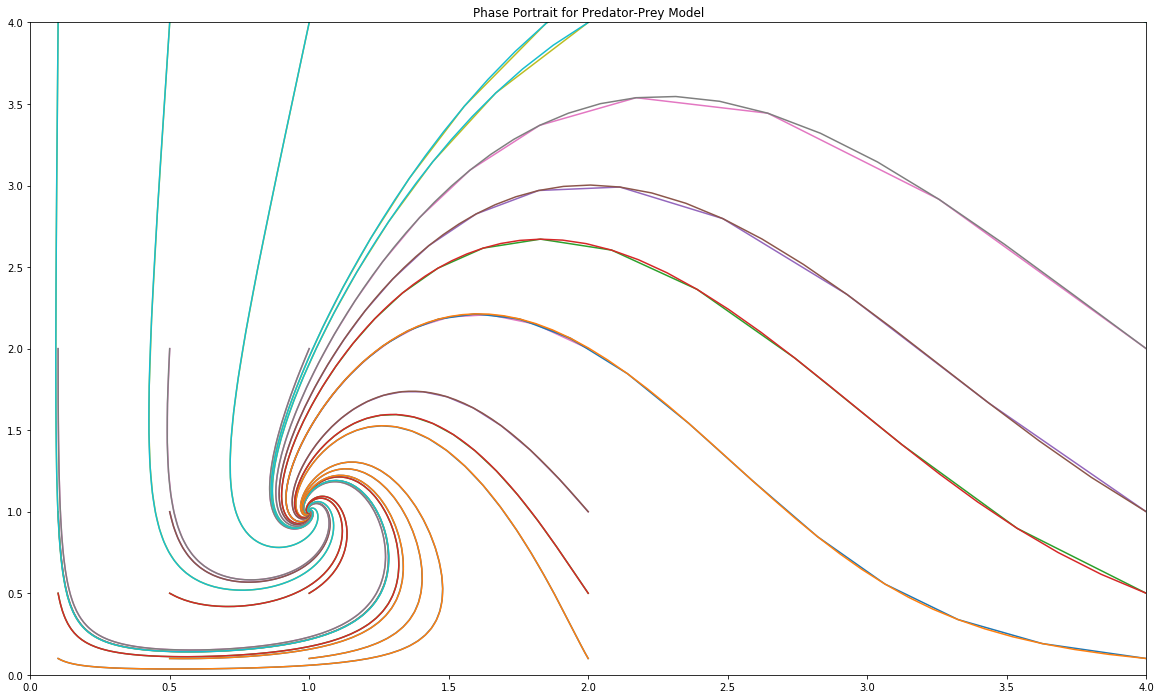

In [3]:
fig = plt.figure(figsize=(20, 12))
plt.title('Phase Portrait for Predator-Prey Model')
plt.xlim(0, 4)
plt.ylim(0, 4)

initial_combinations = itertools.product(
    [0.1, 0.5, 1, 2, 4],
    [0.1, 0.5, 1, 2, 4])

for a, b in initial_combinations:
    initial_condition = np.array([a, b])
    t = np.linspace(0, 15, 300)
    y = odeint(f, initial_condition, t)
    plt.plot(y[:,0], y[:,1])
    
    t = np.linspace(-5, 0, 300)
    y = odeint(f, initial_condition, t)
    plt.plot(y[:,0], y[:,1])
plt.show()

# 2.

## 2.1. Comparison of Gamma generators

In [4]:
from scipy.stats import gamma
from numpy.random import uniform

### Parameter for gamma distribution

In [5]:
a = 4.85 # shape (k or alpha)
M = 3
n_samples = 10000

### Samplers

In [6]:
# original gamma distribution
p = gamma(a, scale=1)

# candidate gamma distribution
q = gamma(int(a), scale=a/int(a))

# uniform
u = uniform

### Candidate gamma distribution
* $\gamma([a], b)$
    * $[a]: int(a)$
    * $b = [a]/a$

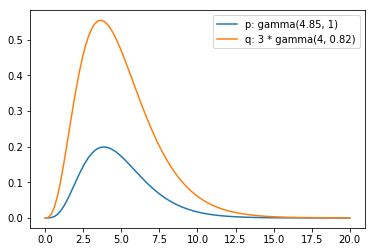

In [7]:
x = np.linspace(0,20,100)
plt.plot(x, p.pdf(x), label=f'p: gamma({a}, 1)')
plt.plot(x, M*q.pdf(x), label=f'q: {M} * gamma({int(a)}, {int(a)/a :.2f})')
plt.legend()
plt.show()

### Sample

### Initialize chain

In [8]:
init = p.rvs()
AR_samples = [init]
MH_samples = [init]

### Accept-Reject

In [9]:
while len(AR_samples) < 10000:
    # candidate
    y = q.rvs()

    rhoAR = p.pdf(y) / (q.pdf(y) * M)
    if u() <= rhoAR:
        AR_samples.append(y)

### (Independent) Metropolis-Hastings

In [10]:
for i in range(1, n_samples):
    # candidate
    y = q.rvs()

    x = MH_samples[i-1]
    rhoMH = ( p.pdf(y) / p.pdf(x) ) / ( q.pdf(y) / q.pdf(x) )
    rhoMH = min(rhoMH, 1)
    if u() <= rhoMH:
        MH_samples.append(y)
    else:
        MH_samples.append(x)

In [11]:
print('# samples of Accept-Reject: ', len(AR_samples))
print('# samples of Metropolis-Hastings: ', len(MH_samples))

# samples of Accept-Reject:  10000
# samples of Metropolis-Hastings:  10000


In [12]:
np.mean(AR_samples)

4.8650731263270703

In [13]:
np.mean(MH_samples)

4.8719315985204492

In [14]:
np.mean(MH_samples[2500:])

4.8672399088473348

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

/home/j-min/anaconda3/envs/mldemo/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


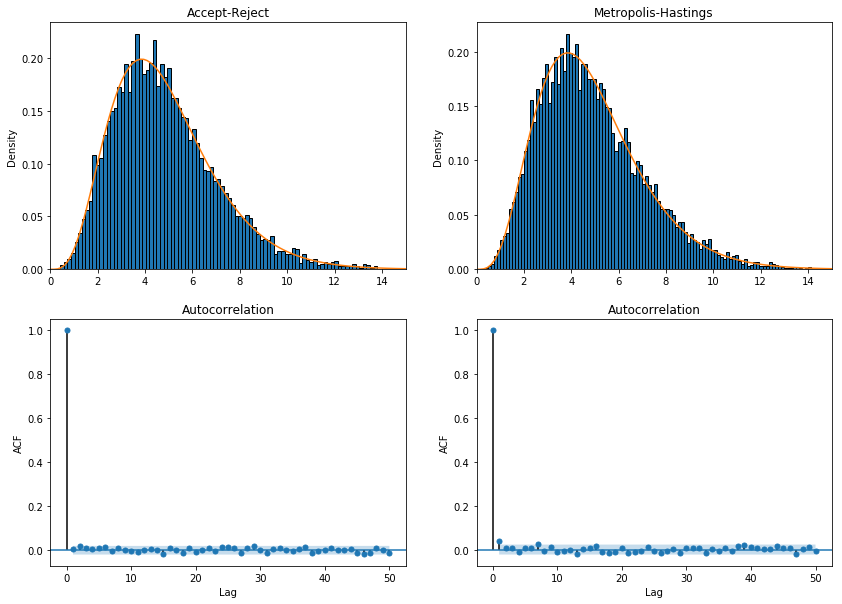

In [16]:
fig, axes = plt.subplots(2,2, figsize=(14,10))

x = np.linspace(0,15,100)

ax = axes[0][0]
ax.set_title('Accept-Reject')
ax.set_ylabel('Density')
ax.set_xlim(0,15)
_ = ax.hist(AR_samples, bins=125, ec='black', normed=True)
ax.plot(x, p.pdf(x), '-')


ax = axes[0][1]
ax.set_title('Metropolis-Hastings')
ax.set_ylabel('Density')
ax.set_xlim(0,15)
_ = ax.hist(MH_samples[2500:], bins=125, ec='black', normed=True)
ax.plot(x, p.pdf(x), '-')

ax = axes[1][0]
plot_acf(AR_samples, ax, lags=50)
ax.set_ylabel('ACF')
ax.set_xlabel('Lag')


ax = axes[1][1]
plot_acf(MH_samples[2500:], ax, lags=50)
ax.set_ylabel('ACF')
ax.set_xlabel('Lag')

plt.show()

In [17]:
print('Accept-Reject')
print(f'Mean: {np.mean(AR_samples):.2f}, Variance: {np.var(AR_samples):.2f}')
print('Metropolis-Hastings')
print(f'Mean: {np.mean(MH_samples[2500:]):.2f}, Variance: {np.var(MH_samples[2500:]):.2f}')

Accept-Reject
Mean: 4.87, Variance: 4.91
Metropolis-Hastings
Mean: 4.87, Variance: 4.97


## 2.2 Metropolis-Hastings on the original Hasting's example

In [18]:
from scipy.stats import norm

In [19]:
n_samples = 1000
random_walk_sizes = [0.1, 1, 10]
n_random_walk_sizes = len(random_walk_sizes)

In [20]:
x = np.zeros([n_random_walk_sizes, n_samples])
x.shape

(3, 1000)

In [21]:
p = norm()
p.stats()

(array(0.0), array(1.0))

In [22]:
for i, a in enumerate(random_walk_sizes):
    for j in range(1, n_samples):
        # Random walk
        y = x[i, j-1] + np.random.uniform(-a, a)
        
        # Acceptance Probability
        rho = min(np.exp(-0.5 * (y**2 - x[i, j-1]**2)), 1)
        
        u = np.random.uniform()
        
        # Accept
        if u < rho:
            x[i, j] = y

        # Reject
        else:
            x[i, j] = x[i, j-1]

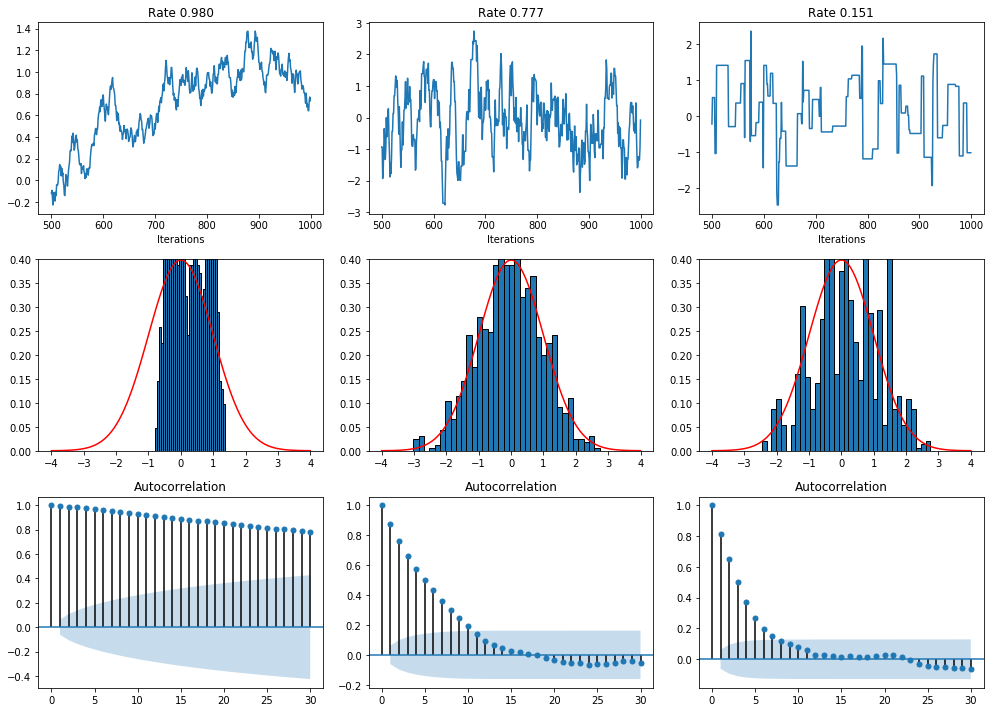

In [23]:
fig, axes = plt.subplots(3, n_random_walk_sizes,  figsize=(14,10))

# Acceptance Rates
for i, ax in enumerate(axes[0]):
    ax.set_title(f'Rate {np.unique(x[i]).size/n_samples:.3f}')
    ax.plot(np.arange(n_samples-500, n_samples),
             x[i, n_samples-500:])
    ax.set_xlabel('Iterations')

# Histogram
x_ = np.linspace(-4, 4, 100)
for i, ax in enumerate(axes[1]):

    ax.set_ylim(0, 0.4)
    ax.hist(x[i, ], bins=35, ec='black', normed=True)
    ax.plot(x_, p.pdf(x_), 'red')

# Autocorrelations
for i, ax in enumerate(axes[2]):
    plot_acf(x[i], ax, lags=30)

plt.tight_layout()
plt.show()

# 3. Conjugate Priors

## 3.1 Beta-Binomial

In [24]:
from scipy.special import beta as beta_function
from scipy.stats import beta

In [25]:
def beta_bi(x,a,b,n):
    return beta_function(x+a, n-x+b) \
        / (beta_function(a, b) * beta_function(x+1, n-x+1) * (n+1))

In [26]:
n_samples = 40000

In [27]:
n = 15
a = 3
b = 7

In [28]:
x = np.zeros(n_samples)
t = np.zeros(n_samples)

### Initialize chain

In [29]:
t[0] = np.random.beta(a, b)
x[0] = np.random.binomial(n, t[0])
for i in range(1, n_samples):
    x[i] = np.random.binomial(n, t[i-1])
    t[i] = np.random.beta(a+x[i], n-x[i]+b)

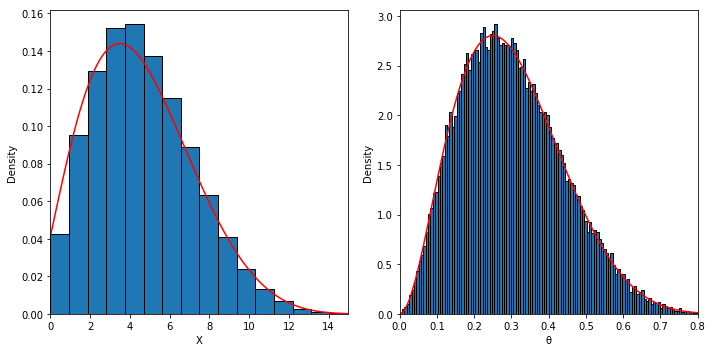

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax = axes[0]
x_ = np.linspace(0, 15, 100)

ax.set_xlim(0, 15)
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.hist(x[2000:], bins=16, ec='black', normed=True)
ax.plot(x_, beta_bi(x_, a, b, n), 'red')



ax = axes[1]
x_ = np.linspace(0, 0.8, 100)

ax.set_xlim(0, 0.8)
ax.set_xlabel('θ')
ax.set_ylabel('Density')
ax.hist(t[2000:], bins=134, ec='black', normed=True)
ax.plot(x_, beta.pdf(x_, a, b), 'red')

plt.tight_layout()
plt.show()

## 3.2. Normal-Gamma

In [31]:
x = [91, 504, 55, 609, 693, 727, 764, 803, 857, 929, 970, 1043, 1089, 1195, 1384, 1713]

In [32]:
n = len(x)
n_samples = 10000

# parameters for tau (gamma)
a = 3
b = 3

# parameters for mu (normal)
mu0 = 5
tau0 = 0.1

In [33]:
x_bar = np.mean(x)
a1 = n/2 + a

In [34]:
tau = np.zeros(n_samples)
mu = np.zeros(n_samples)

### Initialize Chain

In [35]:
tau[0] = np.random.gamma(a, 1/b)
w = tau0 / (tau0 + n*tau[0])
mu[0] = np.random.normal(w*mu0 + (1-w)*x_bar, np.sqrt(w/tau0))

### Sample

In [36]:
for i in range(1, n_samples):
    w = tau0 / (tau0 + n*tau[i-1])
    mu[i] = np.random.normal(w*mu0 + (1-w)*x_bar, np.sqrt(w/tau0))
    b1 = 0.5 * np.sum((x - mu[i])**2) + b
    tau[i] = np.random.gamma(a1, 1/b1)

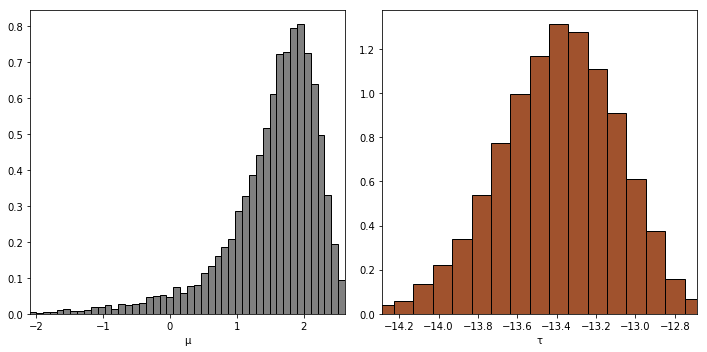

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax = axes[0]
xlim = np.percentile(np.log(mu[mu>0]), [0.5, 99.5])

ax.set_xlim(xlim)
ax.set_xlabel('μ')
ax.hist(np.log(mu[mu>0]), bins=140, ec='black', normed=True, color='grey')


ax = axes[1]
xlim = np.percentile(np.log(tau), [0.5, 99.5])

ax.set_xlim(xlim)
ax.set_xlabel('τ')
ax.hist(np.log(tau), bins=150, ec='black', normed=True, color='sienna')

plt.tight_layout()
plt.show()

# 4.

## 4.1. One-Way ANOVA

In [38]:
girls = [91,  504,  557,  609,  693,  727,  764,  803,  857,  929,  970, 1043, 1089, 1195, 1384, 1713]
boys = [457,  645,  736,  790,  899,  991, 1104, 1154, 1203, 1320, 1417, 1569, 1685, 1843, 2296, 2710]

In [39]:
n_samples = 1000
a = 10
b = 30

In [40]:
x1 = np.log(girls)
x2 = np.log(boys)
n1 = len(x1)
n2 = len(x2)
n = n1 + n2
x1_bar = np.mean(x1)
x2_bar = np.mean(x2)
x_bar = (n1 * x1_bar + n2 * x2_bar)/n

In [41]:
k = 2 # boys/girls

a1 = a
a2 = a
a3 = a

b1 = b
b2 = b
b3 = b

In [42]:
mu0 = x_bar

mu = np.ones(n_samples) * x_bar
mu1 = np.ones(n_samples) * x1_bar
mu2 = np.ones(n_samples) * x2_bar

sigma2 = np.ones(n_samples) * (np.var(x1) + np.var(x2))/2
sigma20 = np.copy(sigma2)
sigma2mu = np.copy(sigma2)

In [43]:
for i in range(1, n_samples):
    w1 = sigma2[i-1]/(sigma2[i-1] + n1 * sigma2mu[i-1])
    mu1[i] = np.random.normal(
        w1 * mu[i-1] + (1 - w1) * x1_bar,
        np.sqrt(sigma2mu[i-1] * w1))
    
    w2 = sigma2[i-1]/(sigma2[i-1] + n2 * sigma2mu[i-1])
    mu2[i] = np.random.normal(
        w2 * mu[i-1] + (1 - w2) * x2_bar,
        np.sqrt(sigma2mu[i-1] * w2))
    
    w = sigma2mu[i-1]/(k * sigma20[i-1] + n1 * sigma2mu[i-1])
    mu[i] = np.random.normal(
        w * mu0 + (1 - w) * (n1 * mu1[i] + n2 * mu2[i])/n,
        np.sqrt(sigma20[i-1] * w))
    
    
    shape1 = n/2 + a1
    rate1 = 0.5 * (sum((x1 - mu1[i])**2) + sum((x2 - mu2[i])**2)) + b1
    sigma2[i] = 1 / np.random.gamma(shape1, 1/rate1)
    
    shape2 = k/2 + a2
    rate2 = 0.5 * ((mu1[i] - mu[i])**2 + (mu2[i] - mu[i])**2) + b2
    sigma2mu[i] = 1 / np.random.gamma(shape2, 1/rate2)
    
    shape3 = 1/2 + a3
    rate3 = 0.5 * (mu[i] - mu0)**2 + b3
    sigma20[i] = 1 / np.random.gamma(shape3, 1/rate3)

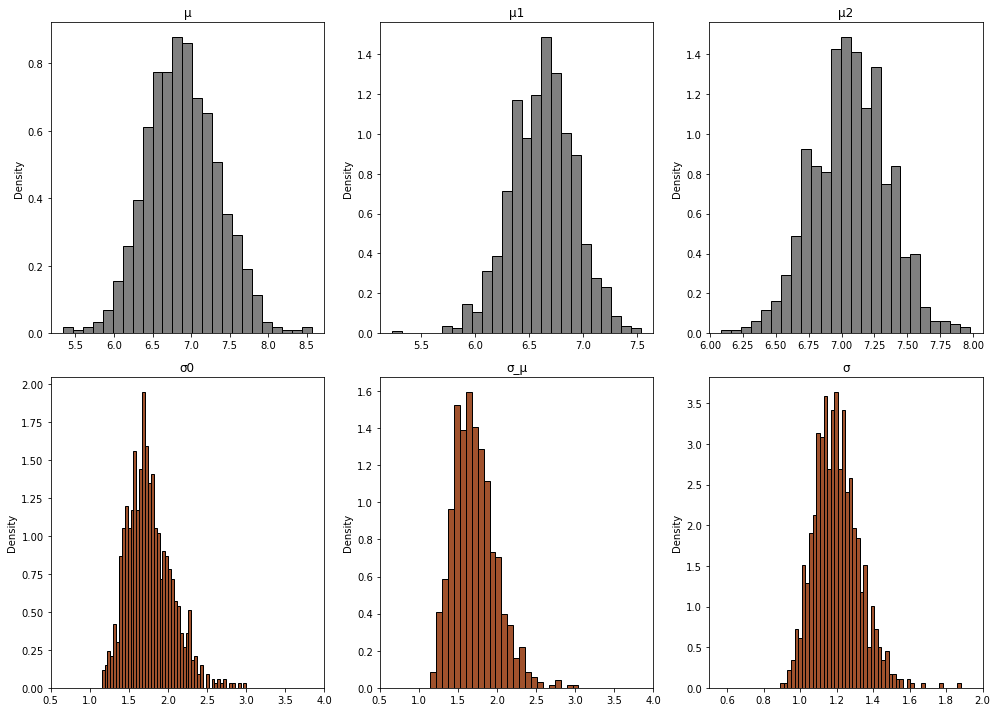

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(14,10))


ax = axes[0][0]
ax.set_title('µ')
ax.set_ylabel('Density')
ax.hist(mu[n_samples//10:], bins=25, ec='black', normed=True, color='grey')

ax = axes[0][1]
ax.set_title('µ1')
ax.set_ylabel('Density')
ax.hist(mu1[n_samples//10:], bins=25, ec='black', normed=True, color='grey')

ax = axes[0][2]
ax.set_title('µ2')
ax.set_ylabel('Density')
ax.hist(mu2[n_samples//10:], bins=25, ec='black', normed=True, color='grey')

ax = axes[1][0]
ax.set_title('σ0')
ax.set_ylabel('Density')
ax.set_xlim(0.5, 4)
ax.hist(np.sqrt(sigma20[n_samples//10:]), bins=50, ec='black', normed=True, color='sienna')

ax = axes[1][1]
ax.set_title('σ_µ')
ax.set_ylabel('Density')
ax.set_xlim(0.5, 4)
ax.hist(np.sqrt(sigma2mu[n_samples//10:]), bins=25, ec='black', normed=True, color='sienna')

ax = axes[1][2]
ax.set_title('σ')
ax.set_ylabel('Density')
ax.set_xlim(0.5, 2)
ax.hist(np.sqrt(sigma2[n_samples//10:]), bins=50, ec='black', normed=True, color='sienna')

plt.tight_layout()
plt.show()

## 4.2. Rao-Blackwellization



In [45]:
from scipy.stats import poisson

In [46]:
n_samples = 1000

In [47]:
lambdas = np.ones(n_samples) * 313/360
RB_lambdas = np.ones(n_samples) * 313/360

In [48]:
z = np.zeros(13)

In [49]:
for j in range(1, n_samples):
    top = int(round(lambdas[j-1] + 6*np.sqrt(lambdas[j-1])))
    prob = poisson.pmf(range(4, top+1), lambdas[j-1])
    cprob = np.cumsum(prob/sum(prob))
    for i in range(13):
        u = np.random.uniform()
        n_larger_than_four = sum(cprob <u)
        z[i] = 4 + n_larger_than_four
    RB_lambdas[j] = (313+sum(z))/360
    lambdas[j] = np.random.gamma(360*RB_lambdas[j], scale=1/360)

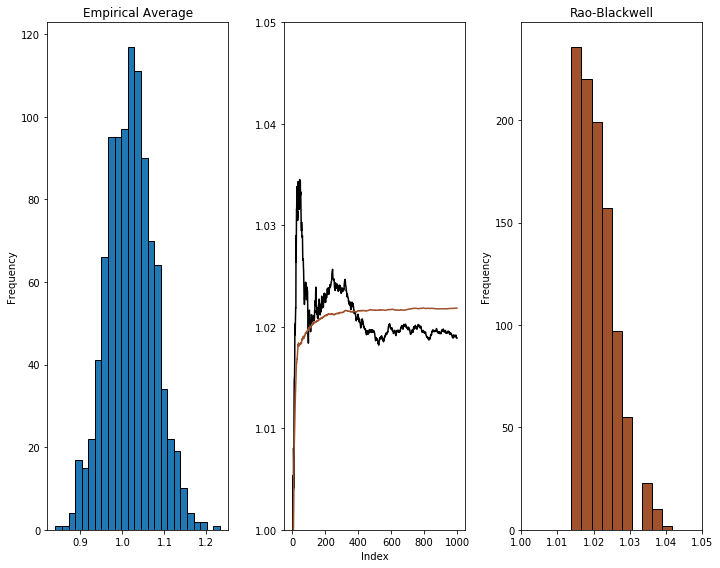

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(10,8))

ax = axes[0]

ax.set_title('Empirical Average')
ax.set_ylabel('Frequency')
ax.hist(lambdas, bins=25, ec='black')

ax = axes[1]

ax.set_ylim(1, 1.05)
ax.set_xlabel('Index')
ax.plot(np.cumsum(lambdas) / np.arange(1, n_samples+1), 'black')
ax.plot(np.cumsum(RB_lambdas) / np.arange(1, n_samples+1), 'sienna')

ax = axes[2]

ax.set_xlim(1, 1.05)
ax.set_title('Rao-Blackwell')
ax.set_ylabel('Frequency')
ax.hist(RB_lambdas, bins=62, ec='black', color='sienna')

plt.tight_layout()
plt.show()